In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/root/Work/cdc_project/FBI_UCR/state_pop_data.csv")

In [13]:
data.loc[:, "child"] = data.age.astype(int) <  4

In [1]:
using Plots, DataFrames, CSV, StatsPlots

In [2]:
# Plot theme and style
theme(:vibrant); # :dark, :light, :plain, :grid, :tufte, :presentation, :none
default(fontfamily="Computer Modern", framestyle=:box); # LaTex-style

In [3]:
data = CSV.read("/root/Work/cdc_project/FBI_UCR/data/stats_80_pct_population_covered.csv", DataFrame) # read data

,year,state,incidents,CM_Other,CM_Physical_Abuse,CM_Neglect,CM_Sexual_Abuse
,Int64,String,Int64,Int64,Int64,Int64,Int64
1,2000,IA,1994,0,239,0,73
2,2001,IA,1911,0,158,0,68
3,2002,IA,1941,0,154,0,80
4,2003,IA,1965,0,197,0,60
5,2004,IA,2035,0,167,0,76
6,2005,IA,2132,0,185,0,82
7,2006,IA,1941,0,124,0,95
8,2007,IA,2017,0,150,0,65
9,2008,IA,2060,0,160,0,99


In [38]:
names(data)

17-element Vector{String}:
 "year"
 "state"
 "incidents"
 "CM_Other"
 "CM_Physical_Abuse"
 "CM_Neglect"
 "CM_Sexual_Abuse"
 "IPV_Other"
 "IPV_Physical_Abuse"
 "IPV_Neglect_or_Emotional_Abuse"
 "IPV_Sexual_Abuse"
 "total_population"
 "nibrs_population"
 "pct_population_covered"
 "incidents_normalized"
 "CM_normalized"
 "IPV_normalized"

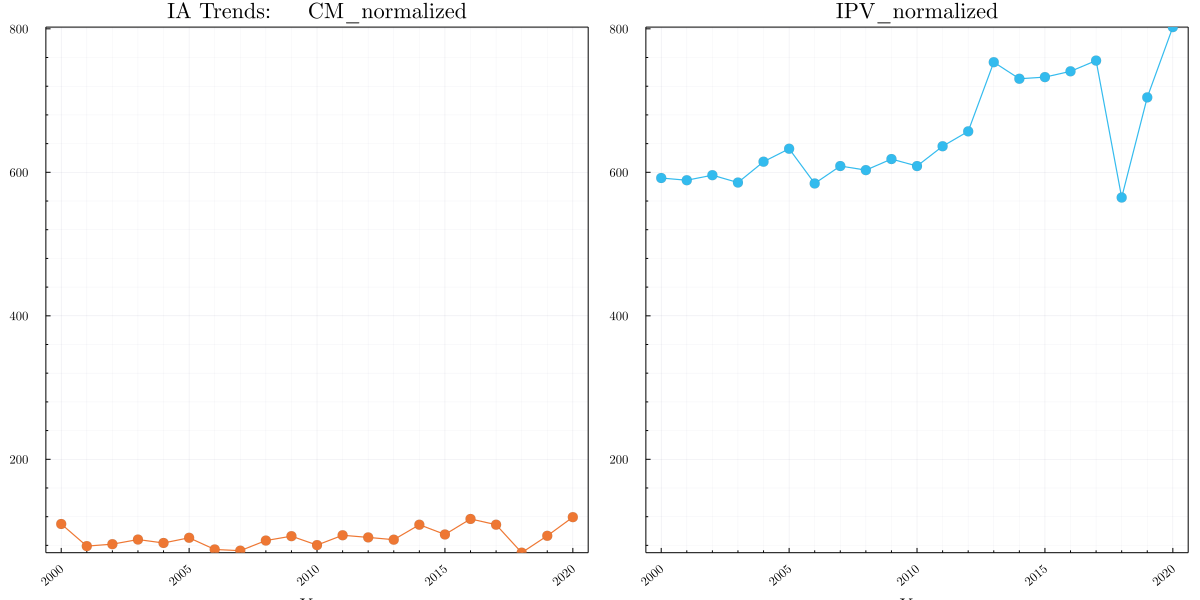

In [28]:
function plot_trend_state(data::DataFrame, state::String)

     sub_data = data[data[:state] .== state, :]
     sub_data = sub_data[sub_data.year .>= 2000, :]
     sort!(sub_data, :year)
     CM = 10^6 * sub_data[:CM_normalized]
     IPV = 10^6 * sub_data[:IPV_normalized]
     y_min = minimum([minimum(CM), minimum(IPV)])
     y_max = maximum([maximum(CM), maximum(IPV)])
     p1 = plot(sub_data.year, CM, type=:line, xlab="Year", legend = :topleft, label ="", markershape=:circle,  xrotation = 40, c=1,
     title= state *" Trends:" * "     CM_normalized" )
     ylims!(y_min, y_max)
     p2 = plot(sub_data.year, sub_data[:pct_population_covered], type=:line, xlab="Year", legend = :topleft, label ="", markershape=:circle,  xrotation = 40, c=2,
     title= "'%' Population Covered")
     p3 = plot(sub_data.year,   10^6 * sub_data[:IPV_normalized], type=:line, xlab="Year", legend = :topleft, label = "", markershape=:circle,  xrotation = 40, c=3,
     title= "IPV_normalized")
     ylims!(y_min, y_max)

     plot(p1, p3, layout = (1,2), size = (1200, 600))
end

plot_trend_state(data, states[1])

In [12]:
states = unique(data.state)

for state in states
    print(state*"*--*")
    plot_trend_state(data, state)
    savefig("/root/Work/cdc_project/FBI_UCR/figures/$(state)_trend_80.pdf")
end

IA*--*ID*--*

SC*--*TN*--*

VA*--*VT*--*

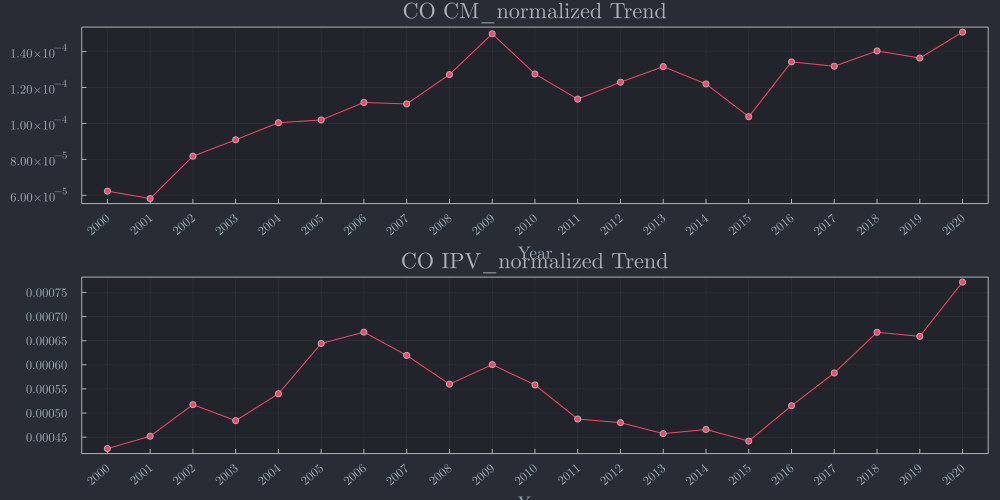

In [54]:
p1 = plot_trend_state(data, "CO", :CM_normalized)
p2 = plot_trend_state(data, "CO", :IPV_normalized)
plot(p1, p2, layout = (2,1), size = (1000, 500))

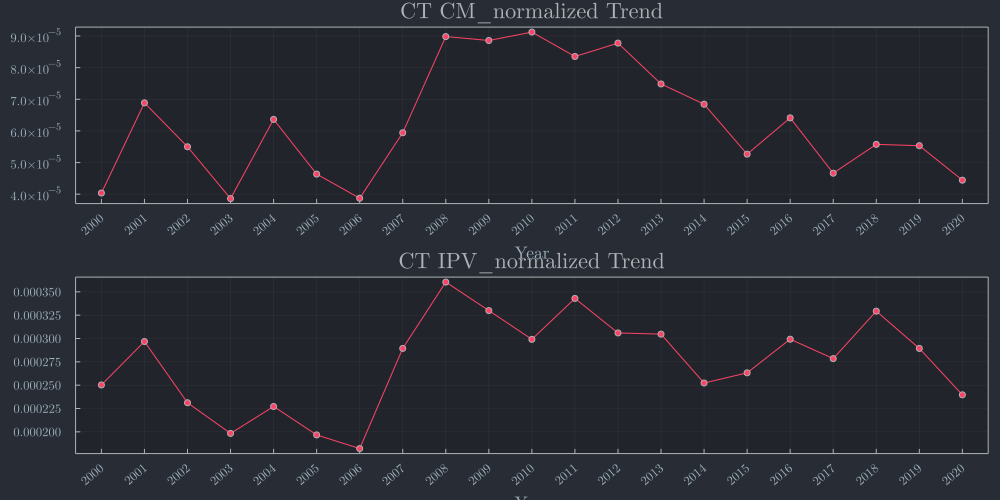

In [56]:
p1 = plot_trend_state(data, "CT", :CM_normalized)
p2 = plot_trend_state(data, "CT", :IPV_normalized)
plot(p1, p2, layout = (2,1), size = (1000, 500))

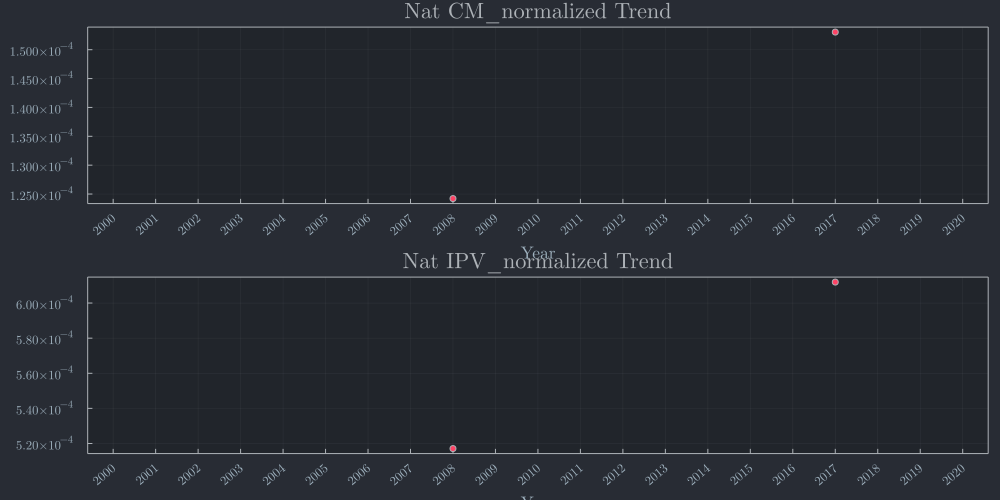

In [55]:
p1 = plot_trend_state(data, "Nat", :CM_normalized)
p2 = plot_trend_state(data, "Nat", :IPV_normalized)
plot(p1, p2, layout = (2,1), size = (1000, 500))

In [107]:
data.state.unique()
# for 

ErrorException: type PooledArray has no field unique